In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [7]:
mat_data = test.values.reshape(test.shape[0],28,28,1)

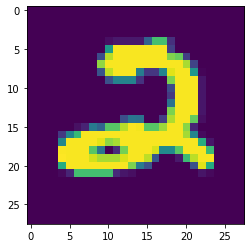

In [8]:
plt.imshow(mat_data[0])

In [9]:
x_train = train.drop(['label'], axis=1)
y_train = train['label']

In [10]:
x_train.shape, y_train.shape

((42000, 784), (42000,))

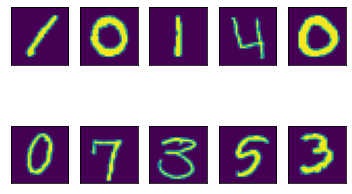

In [13]:
for digit_num in range(0,10):
    plt.subplot(2, 5, digit_num + 1)
    mat_data = x_train.values.reshape(x_train.shape[0], 28,28,1)
    plt.imshow(mat_data[digit_num])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [14]:
y_train[0:10]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [15]:
x_train.shape, y_train.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [16]:
x_train = x_train.astype('float32')/255
test = test.astype('float32')/255

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units= 128, activation='relu', input_dim = 784))
model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dense(units= 10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [21]:
result = model.fit(x_train, y_train, epochs= 50, shuffle=True, batch_size = 32, validation_split=0.2)

Epoch 1/50
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3155 - Accuracy: 0.9057 - val_loss: 0.1576 - val_Accuracy: 0.9546
Epoch 2/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1275 - Accuracy: 0.9623 - val_loss: 0.1298 - val_Accuracy: 0.9614
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0885 - Accuracy: 0.9729 - val_loss: 0.1139 - val_Accuracy: 0.9680
Epoch 4/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0655 - Accuracy: 0.9798 - val_loss: 0.1005 - val_Accuracy: 0.9706
Epoch 5/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0515 - Accuracy: 0.9836 - val_loss: 0.1157 - val_Accuracy: 0.9656
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0435 - Accuracy: 0.9856 - val_loss: 0.1174 - val_Accuracy: 0.9682
Epoch 7/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0316 - Accuracy: 0.9901 - val_loss: 0.1424 - val_Accuracy:

In [22]:
result_df = pd.DataFrame(result.history)

In [23]:
result_df.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.315520,0.905655,0.157563,0.954643
1,0.127508,0.962262,0.129814,0.961429
2,0.088535,0.972946,0.113887,0.967976
3,0.065457,0.979762,0.100486,0.970595
4,0.051483,0.983571,0.115671,0.965595


In [24]:
pred_ = np.argmax(model.predict(test), axis=1)

In [25]:
test_val = pd.read_csv('sample_submission.csv')

In [26]:
test_val.columns

Index(['ImageId', 'Label'], dtype='object')

In [27]:
predData01 = pd.DataFrame(pred_)
Dataset01 = pd.concat([test_val['ImageId'], predData01], axis=1)

In [28]:
Dataset01.columns = ['ImageId','Label']

In [31]:
Dataset01.to_csv('sample_submission01.csv', index=False)

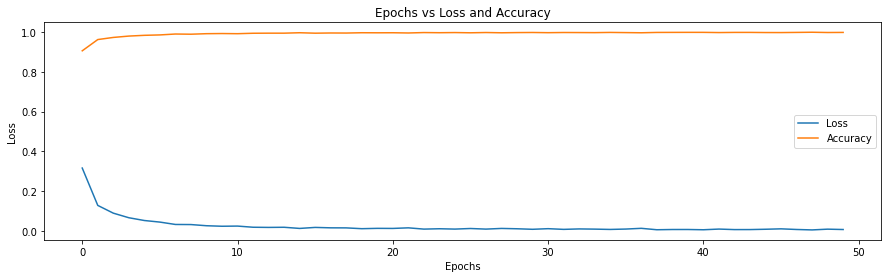

In [30]:
plt.figure(figsize = (15,4))
plt.plot(result_df.loss, label='Loss')
plt.plot(result_df.Accuracy, label='Accuracy')
plt.title('Epochs vs Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

## CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
x_train.shape, y_train.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [35]:
x_train = x_train.values.reshape(x_train.shape[0], 28,28,1)
test = test.values.reshape(test.shape[0], 28,28,1)

In [36]:
x_train.shape, y_train.shape, test.shape

((42000, 28, 28, 1), (42000,), (28000, 28, 28, 1))

In [37]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size= 2))
model.add(Conv2D(filters= 32, kernel_size= (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(units= 64, activation='relu'))
model.add(Dense(units= 32, activation='relu'))
model.add(Dense(units= 10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
result_ = model.fit(x_train, y_train, epochs= 10, shuffle=True, validation_split= 0.2, batch_size = 64)

Epoch 1/10
525/525 [==============================] - 20s 36ms/step - loss: 0.2954 - accuracy: 0.9119 - val_loss: 0.0779 - val_accuracy: 0.9760
Epoch 2/10
525/525 [==============================] - 18s 34ms/step - loss: 0.0773 - accuracy: 0.9755 - val_loss: 0.0686 - val_accuracy: 0.9769
Epoch 3/10
525/525 [==============================] - 18s 35ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.0496 - val_accuracy: 0.9843
Epoch 4/10
525/525 [==============================] - 18s 34ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0458 - val_accuracy: 0.9849
Epoch 5/10
525/525 [==============================] - 18s 34ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 6/10
525/525 [==============================] - 18s 34ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 7/10
525/525 [==============================] - 18s 34ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0634 - val_accuracy:

In [40]:
result_df_ = pd.DataFrame(result_.history)

In [41]:
result_df_

,loss,accuracy,val_loss,val_accuracy
0,0.295448,0.911905,0.077862,0.975952
1,0.077257,0.975536,0.068634,0.976905
2,0.058946,0.982054,0.049588,0.984286
3,0.041032,0.987411,0.045772,0.984881
4,0.034531,0.988988,0.046377,0.985595
5,0.026777,0.991280,0.052512,0.983571
6,0.022537,0.992589,0.063359,0.982262
7,0.019607,0.993839,0.060625,0.983452
8,0.015360,0.994911,0.079564,0.977738
9,0.013672,0.995625,0.040171,0.989762


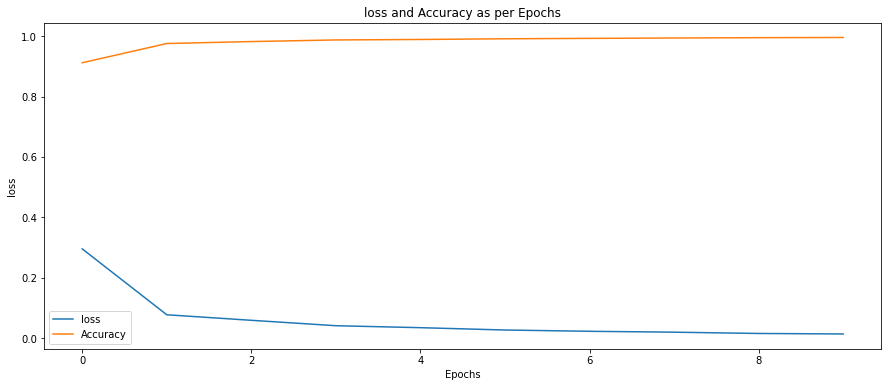

In [42]:
plt.figure(figsize=[15,6])
plt.plot(result_df_.loss, label = 'loss')
plt.plot(result_df_.accuracy, label = 'Accuracy')
plt.legend(loc = 'best')
plt.title("loss and Accuracy as per Epochs")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [43]:
cnn_pred_ = np.argmax(model.predict(test), axis=1)

In [44]:
cnn_pred_

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [45]:
predData02 = pd.DataFrame(cnn_pred_)
Dataset02 = pd.concat([test_val['ImageId'], predData02], axis=1) 

In [47]:
Dataset02.columns = ['ImageId','Label']
Dataset02.to_csv('sample_submission02.csv', index=False)